<a href="https://colab.research.google.com/github/ethansilvas/credit-risk-dnn/blob/main/credit_risk_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

csv_file = files.upload()

Saving credit_data.csv to credit_data (9).csv


In [3]:
credit_df = pd.read_csv('credit_data.csv')
credit_df.head()

,id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,2,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,3,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,4,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,5,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
credit_df.dtypes

id                          int64
status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

In [5]:
# encode categorical features
categorical_features = list(credit_df.dtypes[credit_df.dtypes == 'object'].index)

enc = OneHotEncoder(sparse=False)
encoded_data = enc.fit_transform(credit_df[categorical_features])

encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names(categorical_features))

encoded_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,status_... < 0 DM,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,purpose_business,...,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_0 to 2,people_liable_3 or more,telephone_no,telephone_yes (under customer name),foreign_worker_no,foreign_worker_yes,credit_risk_bad,credit_risk_good
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [6]:
numeric_features = list(credit_df.dtypes[credit_df.dtypes != 'object'].index)

# Scale the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(pd.DataFrame(credit_df[numeric_features])), columns=numeric_features)

scaled_df.head()

,id,duration,amount,age
0,-1.730320,-0.240857,-0.787657,-1.281573
1,-1.726856,-0.987573,-0.167384,0.040363
2,-1.723391,-0.738668,-0.861381,-1.105315
3,-1.719927,-0.738668,-0.407341,0.304750
4,-1.716463,-0.738668,-0.389974,0.216621


In [7]:
credit_df = pd.concat([scaled_df, encoded_df], axis=1)
credit_df.head()

,id,duration,amount,age,status_... < 0 DM,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/other credits elsewhere,...,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_0 to 2,people_liable_3 or more,telephone_no,telephone_yes (under customer name),foreign_worker_no,foreign_worker_yes,credit_risk_bad,credit_risk_good
0,-1.730320,-0.240857,-0.787657,-1.281573,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-1.726856,-0.987573,-0.167384,0.040363,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-1.723391,-0.738668,-0.861381,-1.105315,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-1.719927,-0.738668,-0.407341,0.304750,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-1.716463,-0.738668,-0.389974,0.216621,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [8]:
# Split target column from dataset
y = credit_df['credit_risk_good']
X = credit_df.drop(['credit_risk_good', 'credit_risk_bad'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
num_features = 68
hidden_nodes_l1 = (num_features + 1) // 2
hidden_nodes_l2 = (hidden_nodes_l1 + 1) // 2
hidden_nodes_l3 = (hidden_nodes_l2 + 1) // 2

dnn = Sequential()

# hidden layers 
dnn.add(Dense(units=hidden_nodes_l1, input_dim=num_features, activation='tanh'))
dnn.add(Dense(units=hidden_nodes_l2, activation='tanh'))
dnn.add(Dense(units=hidden_nodes_l3, activation='tanh'))

# output 
dnn.add(Dense(1, activation='sigmoid'))

dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 34)                2346      
                                                                 
 dense_1 (Dense)             (None, 17)                595       
                                                                 
 dense_2 (Dense)             (None, 9)                 162       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 3,113
Trainable params: 3,113
Non-trainable params: 0
_________________________________________________________________


In [10]:
dnn.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

dnn_history = dnn.fit(X_train, y_train, validation_split=0.3, epochs=80, verbose=0)

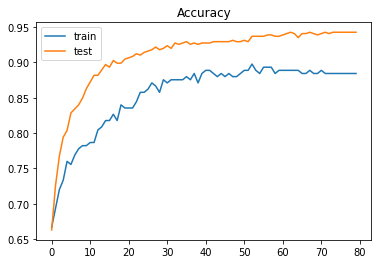

In [11]:
plt.plot(dnn_history.history['val_accuracy'])
plt.plot(dnn_history.history['accuracy'])
plt.title("Accuracy")
plt.legend(["train", "test"])
plt.show()

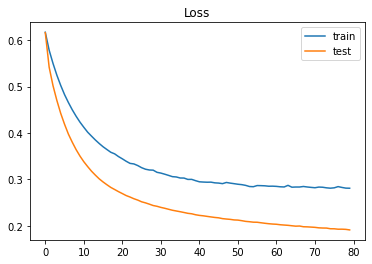

In [12]:
plt.plot(dnn_history.history['val_loss'])
plt.plot(dnn_history.history['loss'])
plt.title("Loss")
plt.legend(["train", "test"])
plt.show()

In [13]:
loss, accuracy = dnn.evaluate(X_test, y_test, verbose=2)

8/8 - 0s - loss: 0.2556 - accuracy: 0.9040 - 27ms/epoch - 3ms/step


In [14]:
# Make predictions
predictions = (dnn.predict(X_test) > 0.5).astype("int32")

# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test})
results['actual'] = results['actual'].astype("int32")

8/8 [==============================] - 0s 2ms/step


In [15]:
# Print classification report
print(classification_report(results.actual, results.predictions))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        74
           1       0.92      0.94      0.93       176

    accuracy                           0.90       250
   macro avg       0.89      0.88      0.88       250
weighted avg       0.90      0.90      0.90       250



In [16]:
dnn.save('credit_dnn.h5')